In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

SVM

- +(C) = (+) bias, (-) variance, (-) # of support vectors [worse fitting in single sample, consistent fitting across samples]

- kernel = "linear" --> Support Vector Classifier

In [2]:
np.random.seed(1)
X = np.reshape(np.random.normal(size=200*2), (200, 2))
X[1:100,] = X[1:100,]+2
X[101:150,] = X[101:150,]-2
y = np.array([1 for x in range(150)] + [2 for x in range(50)])
y = np.reshape(y, (200,1))

df = pd.DataFrame(np.concatenate((X,y),axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,1.624345,-0.611756,1.0
1,1.471828,0.927031,1.0
2,2.865408,-0.301539,1.0
3,3.744812,1.238793,1.0
4,2.319039,1.750630,1.0


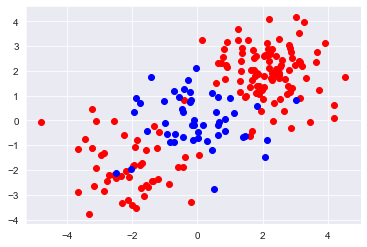

In [3]:
plt.scatter(X[:150, 0], X[:150, 1], color='r')
plt.scatter(X[150:200, 0], X[150:200, 1], color='b')

### Linear kernel

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = SVC(kernel='linear', gamma=1, C=1)
clf.fit(X_train, y_train)

intercept = clf.intercept_
coef = clf.coef_ 
dual_coef_ = clf.coef_
# print(f'clf.support_ : {clf.support_vectors_}') 
# print(f'clf.support_vectors_: {clf.support_vectors_}') 
# print(f'clf.n_support_ : {clf.support_vectors_}') 
# print(f'clf.coef_ : {clf.support_vectors_}') 
# print(f'clf.support_vectors_: {clf.support_vectors_}') 

intercept, coef, dual_coef_

C:\Users\Alex\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-1.00001433]),
 array([[ 3.45225287e-05, -2.71627967e-05]]),
 array([[ 3.45225287e-05, -2.71627967e-05]]))

Text(0.5, 1.0, 'SVC Linear decision boundary')

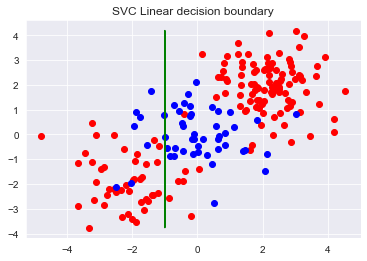

In [5]:
plt.scatter(X[:150, 0], X[:150, 1], color='r')
plt.scatter(X[150:200, 0], X[150:200, 1], color='b')

plt.plot(intercept + (X[:, 0] * coef[0][0]) + (X[:, 0] * coef[0][1]), X[:, 1], color='g')
plt.title('SVC Linear decision boundary')

### RBF kernel

In [6]:
from sklearn.svm import SVC

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

intercept = clf.intercept_
dual_coef_ = clf.dual_coef_
# print(f'clf.support_ : {clf.support_vectors_}') 
# print(f'clf.support_vectors_: {clf.support_vectors_}') 
# print(f'clf.n_support_ : {clf.support_vectors_}') 
# print(f'clf.coef_ : {clf.support_vectors_}') 
# print(f'clf.support_vectors_: {clf.support_vectors_}') 

intercept, dual_coef_

C:\Users\Alex\Miniconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-0.52902411]),
 array([[-1.        , -1.        , -0.61425946, -0.96303412, -0.01267401,
         -0.08059658, -1.        , -0.18451585, -0.21272099, -0.69267632,
         -0.19082413, -0.01990073, -1.        , -0.17592148, -0.38130883,
         -1.        , -0.03211485, -0.54924032, -1.        , -0.26049296,
         -0.14694371, -0.14622497, -0.32319635, -0.3611757 , -0.05263311,
         -0.32620806, -1.        , -0.95754735, -0.31962169, -0.22444946,
         -1.        , -0.21293343, -0.19763114, -1.        , -0.23140466,
         -0.8619787 , -0.79281826, -0.4309788 , -1.        , -0.03050632,
         -0.29632191, -0.52366609, -1.        , -1.        , -0.29060077,
         -0.89188104, -0.33742037,  0.9853605 ,  1.        ,  0.54459407,
          1.        ,  0.94642635,  1.        ,  1.        ,  0.43730814,
          0.14774486,  1.        ,  1.        ,  0.69846039,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  0.70426097,
          1.   

In [7]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'SVC RBF classifier')

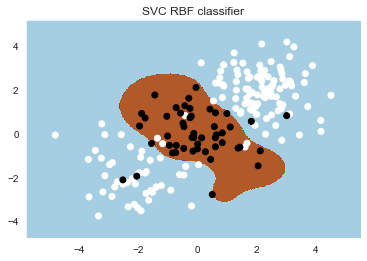

In [8]:
# color map reference page - https://matplotlib.org/examples/color/colormaps_reference.html
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.binary)
plt.title('SVC RBF classifier')

### Non-linear kernels

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

y = np.reshape(y, 200,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)


rbf_svc = SVC(kernel='rbf')
poly_svc = SVC(kernel='poly')

# rbf kernel
clf_rbf = GridSearchCV(rbf_svc, 
                       {'gamma':np.arange(0.1, 1, 0.2),
                        'C':np.arange(0.5, 4, 0.5)}, # SVM regularization parameter
                       cv=3)
clf_rbf.fit(X_train, y_train)
clf_rbf_svc = clf_rbf.best_estimator_

# poly kernel
clf_poly = GridSearchCV(poly_svc, 
                        {'gamma':np.arange(0.1, 1, 0.2),
                         'C':np.arange(0.5, 4, 0.5), # SVM regularization parameter
                         'degree':np.arange(2,5)},
                        cv=3)
clf_poly.fit(X_train, y_train)
clf_poly_svc = clf_poly.best_estimator_

In [10]:
clf_rbf.best_params_ 

{'C': 1.0, 'gamma': 0.7000000000000001}

In [11]:
clf_poly.best_params_ 

{'C': 0.5, 'degree': 2, 'gamma': 0.30000000000000004}

In [12]:
h = .02  # step size in the mesh

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'SVC RBF classifier')

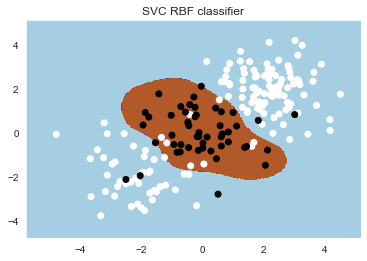

In [13]:
Z = clf_rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.binary)
plt.title(f'SVC RBF classifier')

Text(0.5, 1.0, 'SVC POLY (degree=2) classifier')

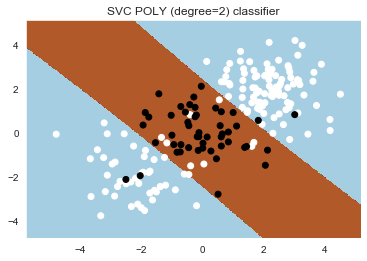

In [14]:
Z = clf_poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.binary)
plt.title(f'SVC POLY (degree=2) classifier')

### ROC

In [15]:
def plot_roc(false_positive_rate, true_positive_rate, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

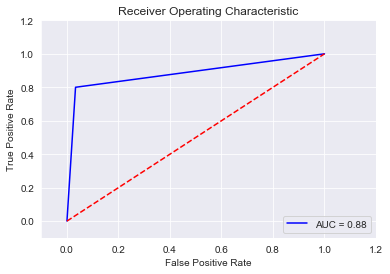

In [16]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, 
                                                                clf_rbf_svc.predict(X_test),
                                                                pos_label=2)
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc(false_positive_rate, true_positive_rate, roc_auc)

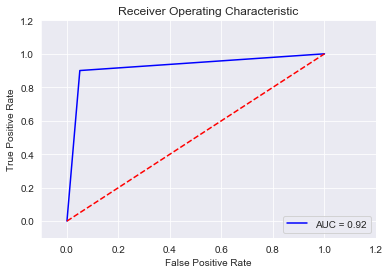

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, 
                                                                clf_poly_svc.predict(X_test),
                                                                pos_label=2)
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc(false_positive_rate, true_positive_rate, roc_auc)

### SVM with +2 classes

In [18]:
np.random.seed(1)
X = np.reshape(np.random.normal(size=200*2), (200, 2))
X[1:100,] = X[1:100,]+2
X[101:150,] = X[101:150,]-2
X[150:,] = X[150:,]
y = np.array([1 for x in range(125)] + [2 for x in range(50)] + [3 for x in range(25)])
y = np.reshape(y, (200,1))

df = pd.DataFrame(np.concatenate((X,y),axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,1.624345,-0.611756,1.0
1,1.471828,0.927031,1.0
2,2.865408,-0.301539,1.0
3,3.744812,1.238793,1.0
4,2.319039,1.750630,1.0


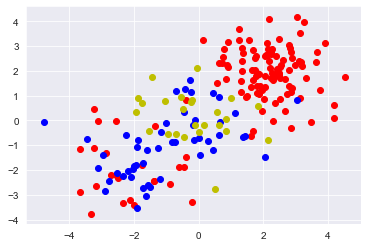

In [19]:
plt.scatter(X[:125, 0], X[:125, 1], color='r')
plt.scatter(X[125:175, 0], X[125:175, 1], color='b')
plt.scatter(X[175:, 0], X[175:, 1], color='y')

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

y = np.reshape(y, 200,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)


rbf_svc = SVC(kernel='rbf')
poly_svc = SVC(kernel='poly')

# rbf kernel
clf_rbf = GridSearchCV(rbf_svc, 
                       {'gamma':np.arange(0.1, 1, 0.2),
                        'C':np.arange(0.5, 4, 0.5),
                        'decision_function_shape': ['ovo']}, # SVM regularization parameter
                       cv=3)
clf_rbf.fit(X_train, y_train)
clf_rbf_svc = clf_rbf.best_estimator_

# poly kernel
clf_poly = GridSearchCV(poly_svc, 
                        {'gamma':np.arange(0.1, 1, 0.2),
                         'C':np.arange(0.5, 4, 0.5), # SVM regularization parameter
                         'degree':np.arange(2,5),
                         'decision_function_shape': ['ovo']},
                        cv=3)
clf_poly.fit(X_train, y_train)
clf_poly_svc = clf_poly.best_estimator_

C:\Users\Alex\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Alex\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
clf_rbf.best_params_ 

{'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 0.1}

In [22]:
clf_poly.best_params_ 

{'C': 1.0,
 'decision_function_shape': 'ovo',
 'degree': 4,
 'gamma': 0.9000000000000001}

In [23]:
h = .02  # step size in the mesh

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'SVC RBF classifier')

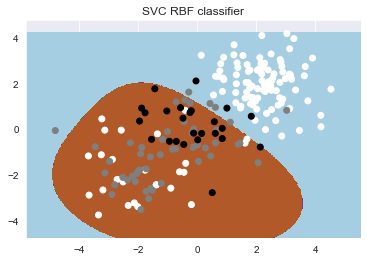

In [24]:
Z = clf_rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.binary)
plt.title(f'SVC RBF classifier')

Text(0.5, 1.0, 'SVC POLY (degree=2) classifier')

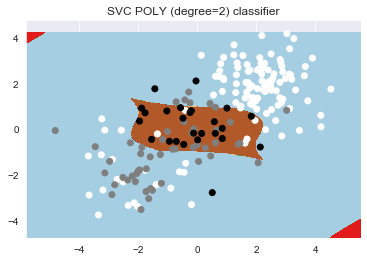

In [25]:
Z = clf_poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.binary)
plt.title(f'SVC POLY (degree=2) classifier')

## Exercises

### 1.

In [26]:
np.random.seed(1)

X = np.reshape(np.random.normal(size=50*2), (50,2))
y = np.reshape(np.ones(50) + 3 * X[:, 0] - X[:, 1], (50,1))


df = pd.DataFrame(np.concatenate((X,y),axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,1.624345,-0.611756,6.484793
1,-0.528172,-1.072969,0.488453
2,0.865408,-2.301539,5.897762
3,1.744812,-0.761207,6.995642
4,0.319039,-0.249370,2.206488


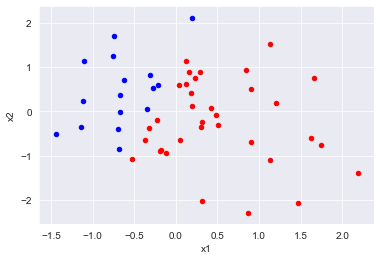

In [27]:
ax = df[df['y'] > 0].plot.scatter(x='x1', y='x2', color='r')
df[df['y'] < 0].plot.scatter(x='x1', y='x2', color='b', ax=ax)

### 2.

In [28]:
np.random.seed(1)

X = np.reshape(np.random.normal(size=50*2), (50,2))
y = np.power(np.ones(50) + X[:, 0], 2) + \
    np.power(np.ones(50) * 2 - X[:, 1], 2)
y = np.reshape(y, (50,1))

df = pd.DataFrame(np.concatenate((X,y),axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,1.624345,-0.611756,13.708460
1,-0.528172,-1.072969,9.665758
2,0.865408,-2.301539,21.982981
3,1.744812,-0.761207,15.158255
4,0.319039,-0.249370,6.799531


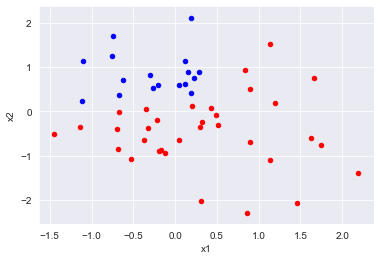

In [29]:
ax = df[df['y'] > 4].plot.scatter(x='x1', y='x2', color='r')
df[df['y'] <= 4].plot.scatter(x='x1', y='x2', color='b', ax=ax)

### 5.

In [30]:
size_ = 10_000
x1 = np.random.uniform(size=size_) - 0.5
x2 = np.random.uniform(size=size_) - 0.5
y = 1 * (np.power(x1, 2) - np.power(x2, 2) > 0.05)
print(dict(pd.Series(y).value_counts()))

{0: 7021, 1: 2979}


In [31]:
x1 = np.reshape(x1, (size_, 1))
x2 = np.reshape(x2, (size_, 1))
y = np.reshape(y, (size_, 1))

df = pd.DataFrame(np.concatenate((x1, x2, y), axis=1), columns=['x1', 'x2', 'y'])

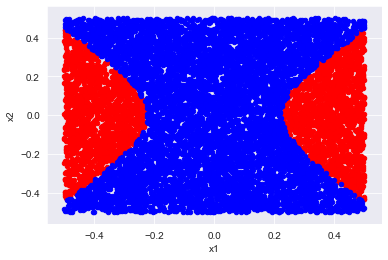

In [32]:
ax = df[df['y'] > 0].plot.scatter(x='x1', y='x2', color='r')
df[df['y'] <= 0].plot.scatter(x='x1', y='x2', color='b', ax=ax)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = np.concatenate((x1, x2), axis=1)

clf = LogisticRegression(solver='lbfgs', 
                         random_state=0, 
                         multi_class='multinomial',
                         class_weight = 'balanced')
clf.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [34]:
y_pred = clf.predict(X)
y_pred.shape
np.bincount(y.ravel()), np.bincount(y_pred)
y_pred = np.reshape(y_pred, (size_, 1))

df = pd.DataFrame(np.concatenate((X, y_pred), axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,0.307105,0.296499,0.0
1,-0.112139,0.454038,1.0
2,0.363542,-0.006048,0.0
3,0.247122,-0.284640,0.0
4,0.056240,0.079632,0.0


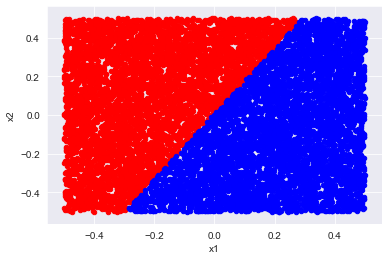

In [35]:
ax = df[df['y'] > 0.5].plot.scatter(x='x1', y='x2', color='r')
df[df['y'] <= 0.5].plot.scatter(x='x1', y='x2', color='b', ax=ax)

#### 5.e

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

clf = LogisticRegression(solver='lbfgs', 
                         random_state=0, 
                         multi_class='multinomial')
clf.fit(X_poly, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = np.reshape(clf.predict(X_poly), (size_, 1))
df = pd.DataFrame(np.concatenate((X, y_pred), axis=1), columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,0.307105,0.296499,0.0
1,-0.112139,0.454038,0.0
2,0.363542,-0.006048,1.0
3,0.247122,-0.284640,0.0
4,0.056240,0.079632,0.0


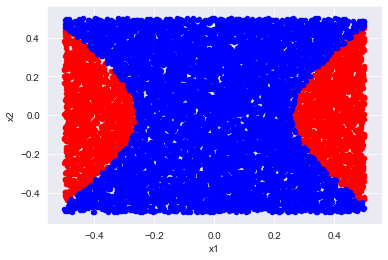

In [42]:
ax = df[df['y'] > 0.5].plot.scatter(x='x1', y='x2', color='r')
df[df['y'] <= 0.5].plot.scatter(x='x1', y='x2', color='b', ax=ax)

#### 5.f

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

poly_svc = SVC(kernel='poly')

# poly kernel
clf_poly = GridSearchCV(poly_svc, 
                        {'gamma':np.arange(0.1, 1, 0.2),
                         'C':np.arange(0.5, 4, 0.5), # SVM regularization parameter
                         'degree':np.arange(2,5),
                         'decision_function_shape': ['ovo']},
                        cv=3)
clf_poly.fit(X, y.ravel())
clf_poly_svc = clf_poly.best_estimator_

In [44]:
clf_poly.best_params_ 

{'C': 3.5,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 0.9000000000000001}

In [45]:
h = .02  # step size in the mesh

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Text(0.5, 1.0, 'SVC POLY (degree=2) classifier')

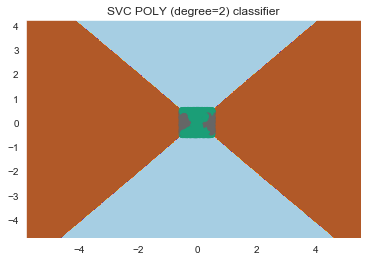

In [46]:
Z = clf_poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Dark2)
plt.title(f'SVC POLY (degree=2) classifier')